In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data.csv')
print(df)

         Model     Condition  Months Old  Demand Score  Price (INR)
0     fx-991MS      Like New          27           8.6        430.0
1     fx-991MS           New          33           7.8        340.0
2     fx-570ES  Heavily Used          12           6.2        230.0
3     fx-991MS           New          18           6.6        370.0
4     fx-991MS      Like New           5           5.3        400.0
...        ...           ...         ...           ...          ...
1995  fx-991MS           New          13           8.8        400.0
1996  fx-570ES  Heavily Used           4           8.5        210.0
1997  fx-991MS      Like New          27           6.9        360.0
1998  fx-991MS  Heavily Used          26           5.8        150.0
1999  fx-991MS           New          40           7.7        510.0

[2000 rows x 5 columns]


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Model         2000 non-null   object 
 1   Condition     2000 non-null   object 
 2   Months Old    2000 non-null   int64  
 3   Demand Score  2000 non-null   float64
 4   Price (INR)   2000 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 78.3+ KB


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
X = df.drop("Price (INR)", axis=1)  # Features
y = df["Price (INR)"]  # Target variable

# Step 1: Split into Train (80%) and Test+Validation (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Split X_temp into Test (10%) and Validation (10%)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print dataset shapes
print(f"Training Set: {X_train.shape}, {y_train.shape}")
print(f"Validation Set: {X_val.shape}, {y_val.shape}")
print(f"Test Set: {X_test.shape}, {y_test.shape}")

Training Set: (1600, 4), (1600,)
Validation Set: (200, 4), (200,)
Test Set: (200, 4), (200,)


In [10]:
X_train
numerical_inputs = X_train.select_dtypes(include=['int64', 'float64'])
categorical_inputs = X_train.select_dtypes(include=['object'])
print(numerical_inputs)
print(categorical_inputs)

      Months Old  Demand Score
968           41           7.4
240            0           8.9
819           15           8.6
692           16           9.1
420            0           6.2
...          ...           ...
1130          27           7.0
1294          15           7.7
860           46           5.3
1459          30           8.5
1126           2           8.0

[1600 rows x 2 columns]
         Model     Condition
968    fx-82MS           New
240    fx-82MS      Like New
819   fx-570ES  Heavily Used
692   fx-570ES          Used
420    fx-82MS           New
...        ...           ...
1130  fx-570ES      Like New
1294  fx-570ES  Heavily Used
860    fx-82MS  Heavily Used
1459   fx-82MS      Like New
1126  fx-570ES           New

[1600 rows x 2 columns]


In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Load dataset
df = pd.read_csv("data.csv")

# Define features and target
X = df.drop("Price (INR)", axis=1)  # Features
y = df["Price (INR)"]  # Target variable

# Convert categorical features into numerical using one-hot encoding (without dropping categories)
X = pd.get_dummies(X, columns=["Model", "Condition"], drop_first=False)

# Split dataset into Train (80%) and Test+Validation (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Split X_temp into Test (10%) and Validation (10%)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit only on the training set
X_train_scaled = scaler.fit_transform(X_train)

# Transform validation and test sets using the fitted scaler
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame (optional)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Print scaled datasets
print(f"Training Set:\n{X_train_scaled.head()}\n")
print(f"Validation Set:\n{X_val_scaled.head()}\n")
print(f"Test Set:\n{X_test_scaled.head()}\n")


Training Set:
   Months Old  Demand Score  Model_fx-570ES  Model_fx-82MS  Model_fx-991MS  \
0    0.854167      0.533333             0.0            1.0             0.0   
1    0.000000      0.866667             0.0            1.0             0.0   
2    0.312500      0.800000             1.0            0.0             0.0   
3    0.333333      0.911111             1.0            0.0             0.0   
4    0.000000      0.266667             0.0            1.0             0.0   

   Condition_Heavily Used  Condition_Like New  Condition_New  Condition_Used  
0                     0.0                 0.0            1.0             0.0  
1                     0.0                 1.0            0.0             0.0  
2                     1.0                 0.0            0.0             0.0  
3                     0.0                 0.0            0.0             1.0  
4                     0.0                 0.0            1.0             0.0  

Validation Set:
   Months Old  Demand Scor

In [51]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [52]:
# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=300,  # More trees for stability
    max_depth=7,  # Control overfitting
    min_samples_split=10,  # Avoid overfitting
    min_samples_leaf=3,  # Avoid deep trees
    random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)

# Train XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=75,  # More boosting rounds
    max_depth=7,  # Slightly deeper trees
    learning_rate=0.03,  # Lower for better generalization
    subsample=0.85,  # Reduce overfitting
    colsample_bytree=0.8,
    random_state=42)
xgb_model.fit(X_train_scaled, y_train)
xgb_pred = xgb_model.predict(X_test_scaled)

# Train Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)

# Evaluate models using R² Score
rf_accuracy = r2_score(y_test, rf_pred)
xgb_accuracy = r2_score(y_test, xgb_pred)
lr_accuracy = r2_score(y_test, lr_pred)

# Print accuracies
print(f"Random Forest R² Score: {rf_accuracy:.4f}")
print(f"XGBoost R² Score: {xgb_accuracy:.4f}")
print(f"Linear Regression R² Score: {lr_accuracy:.4f}")

Random Forest R² Score: 0.7473
XGBoost R² Score: 0.7504
Linear Regression R² Score: 0.7338


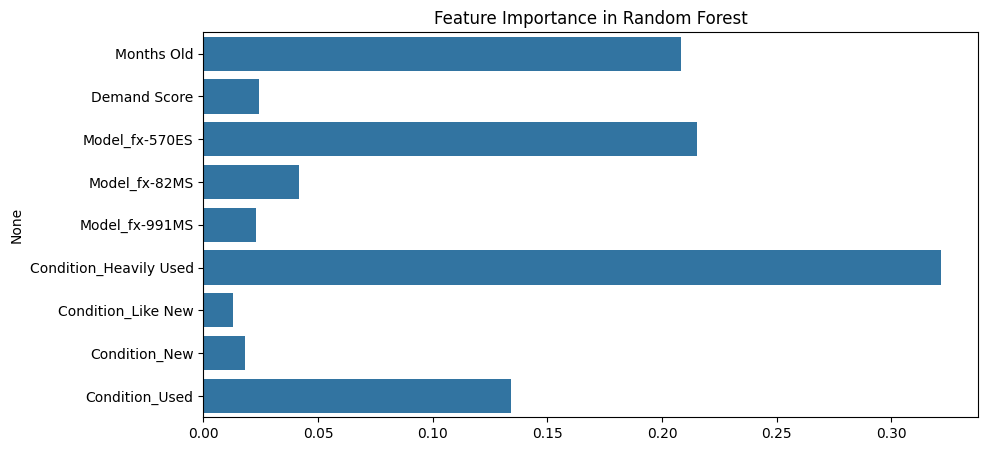

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importance from Random Forest
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)

# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances.values, y=feature_importances.index)
plt.title("Feature Importance in Random Forest")
plt.show()


In [54]:
X_train.columns

Index(['Months Old', 'Demand Score', 'Model_fx-570ES', 'Model_fx-82MS',
       'Model_fx-991MS', 'Condition_Heavily Used', 'Condition_Like New',
       'Condition_New', 'Condition_Used'],
      dtype='object')

In [68]:
xgb_model.predict([[1, 0, 0, 1, 0, 1, 0, 0, 0]])


array([142.15622], dtype=float32)

In [69]:
import joblib
calculator={
    'model': xgb_model,
    'final_cols': X_train.columns.tolist()
}
joblib.dump(calculator, 'calculatorModel.joblib')

['calculatorModel.joblib']